In [6]:
import os

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
import datetime
%matplotlib inline

In [32]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")

No GPU device found


In [31]:
device=tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(device[0],True)

IndexError: list index out of range

In [36]:
pip install split-folders

In [2]:
train_dir='D:/UGP II ideas/project/Facial Expression Recognition/Data Set/train'
test_dir='D:/UGP II ideas/project/Facial Expression Recognition/Data Set/test'
print(len(os.listdir(train_dir)))
print(len(os.listdir(test_dir)))

7
7


In [29]:
start = datetime.datetime.now()
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
end = datetime.datetime.now()

In [30]:
print(end-start)

0:00:00


In [3]:
img=cv2.imread('D:/UGP II ideas/project/Facial Expression Recognition/Data Set/train/angry/Training_10290703.jpg')
# img_binary = cv2.
# ret,thresh = cv2.threshold(img,90,120,0)
#plt.imshow(thresh)
img.shape

(48, 48, 3)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255.0, 
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)

trainDatagen=train_datagen.flow_from_directory(train_dir,
                                 target_size=(48,48),
                                 batch_size=64,
                                 class_mode='categorical',
                                 color_mode='grayscale',subset='training')
                                
valDatagen=val_datagen.flow_from_directory(test_dir,
                                      target_size=(48,48),
                                      batch_size=64,
                                      class_mode='categorical',
                                      color_mode='grayscale',subset='validation')



Found 28709 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [128]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization_12 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 22, 22, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 20, 20, 64)       

In [7]:
class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('accuracy')>=0.99):
            self.model.stop_training=True
            print("MODEL AS REACHED AMAZING ACCURACY")

In [131]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model.fit(x=trainDatagen,epochs=50,validation_data=valDatagen,shuffle=True)

Epoch 1/50
359/359 [==============================] - 500s 1s/step - loss: 2.3356 - accuracy: 0.2155 - val_loss: 1.7915 - val_accuracy: 0.2486
Epoch 2/50
359/359 [==============================] - 75s 208ms/step - loss: 1.8513 - accuracy: 0.2992 - val_loss: 1.8002 - val_accuracy: 0.3010
Epoch 3/50
359/359 [==============================] - 73s 202ms/step - loss: 1.6845 - accuracy: 0.3529 - val_loss: 1.7965 - val_accuracy: 0.3122
Epoch 4/50
359/359 [==============================] - 75s 209ms/step - loss: 1.5670 - accuracy: 0.4013 - val_loss: 1.7272 - val_accuracy: 0.3520
Epoch 5/50
359/359 [==============================] - 70s 196ms/step - loss: 1.4893 - accuracy: 0.4317 - val_loss: 1.4519 - val_accuracy: 0.4791
Epoch 6/50
359/359 [==============================] - 71s 196ms/step - loss: 1.4206 - accuracy: 0.4558 - val_loss: 1.3669 - val_accuracy: 0.4846
Epoch 7/50
359/359 [==============================] - 68s 188ms/step - loss: 1.3800 - accuracy: 0.4685 - val_loss: 1.3858 - val_accu

NameError: name 'history1' is not defined

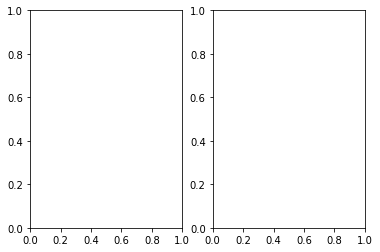

In [21]:
fig , ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history1.history['accuracy'])
ax[0].plot(history1.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history1.history['loss'])
ax[1].plot(history1.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [132]:
model.save('first_optimal_model.h5')

In [8]:
from tensorflow.keras import regularizers

In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Convolution2D(filters=32,kernel_size=3 ,activation='relu', input_shape=[48, 48, 1]))
cnn.add(tf.keras.layers.Convolution2D(filters=64,kernel_size=3 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=5 ,activation='relu',padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Convolution2D(filters=512,kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Convolution2D(filters=512,kernel_size=3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten()) 
cnn.add(tf.keras.layers.Dense(256,activation = 'relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))
    
cnn.add(tf.keras.layers.Dense(512,activation = 'relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Dense(7, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       2

In [ ]:
pip install pydot

In [10]:
class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('accuracy')>=0.99):
            self.model.stop_training=True
            print("MODEL AS REACHED AMAZING ACCURACY")

In [ ]:
pip install scipy

In [ ]:
import scipy

In [11]:
callbacks=mycallbacks()
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
history=cnn.fit(x=trainDatagen,epochs=100,validation_data=valDatagen,callbacks=[callbacks],shuffle=True)

Epoch 1/100
449/449 [==============================] - 1083s 2s/step - loss: 9.2117 - accuracy: 0.1859 - val_loss: 8.2337 - val_accuracy: 0.2531
Epoch 2/100
449/449 [==============================] - 372s 827ms/step - loss: 7.9365 - accuracy: 0.2117 - val_loss: 7.0733 - val_accuracy: 0.2582
Epoch 3/100
449/449 [==============================] - 302s 673ms/step - loss: 6.7082 - accuracy: 0.2293 - val_loss: 5.9077 - val_accuracy: 0.2793
Epoch 4/100
449/449 [==============================] - 318s 709ms/step - loss: 5.5868 - accuracy: 0.2495 - val_loss: 4.9081 - val_accuracy: 0.2891
Epoch 5/100
449/449 [==============================] - 369s 822ms/step - loss: 4.6227 - accuracy: 0.2797 - val_loss: 4.0311 - val_accuracy: 0.3412
Epoch 6/100
449/449 [==============================] - 340s 758ms/step - loss: 3.8409 - accuracy: 0.3115 - val_loss: 3.3679 - val_accuracy: 0.3811
Epoch 7/100
449/449 [==============================] - 304s 675ms/step - loss: 3.2592 - accuracy: 0.3495 - val_loss: 2.8

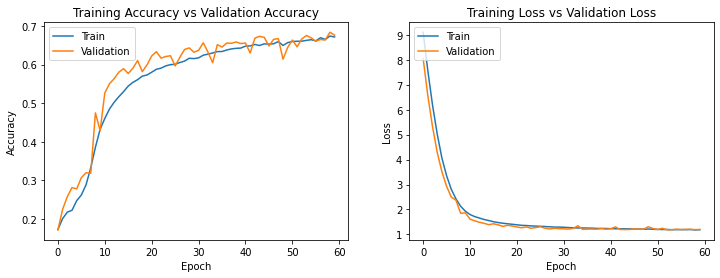

In [13]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [105]:
cnn.save('model_optimal_alpha.h5')

In [19]:

test_loss, test_acc   = cnn.evaluate(testDatagen)
print("validation accuracy = {:.2f}".format( test_acc*100))

90/90 [==============================] - 25s 281ms/step - loss: 1.3022 - accuracy: 0.6494
validation accuracy = 64.94


In [5]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']

In [6]:
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(48,48),
    color_mode="grayscale",
    shuffle=True,
    batch_size=64,
)

Found 7178 images belonging to 7 classes.


In [32]:
batch_size=64

In [32]:
Random_batch = np.random.randint(0, len(test_generator) - 1)
Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Prediction = np.argmax(model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))
    ax.imshow(Random_Img)
    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

NameError: name 'batch_size' is not defined

In [ ]:
Predictions =cnn.predict(test_generator)
#Choosing highest probalbilty class in every prediction 
Model_Predictions = np.argmax(Predictions, axis=1)

In [23]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 9.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.0 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Confusion Matrix')

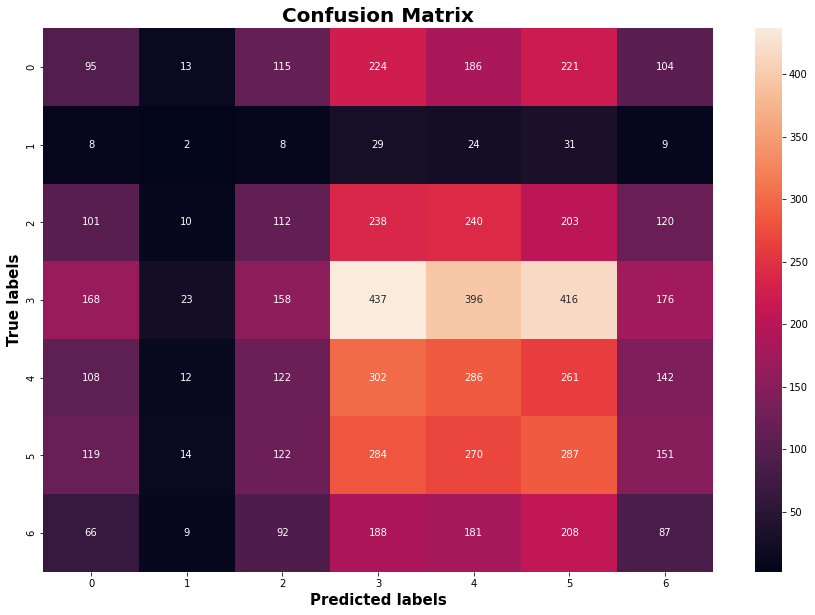

In [92]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
fig, ax= plt.subplots(figsize=(15,10))
cm=confusion_matrix(test_generator.labels, Model_Predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=20, fontweight='bold')

In [8]:
from tensorflow.keras.utils import to_categorical, plot_model

In [101]:
plot_model(cnn)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install graphiz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement graphiz (from versions: none)
ERROR: No matching distribution found for graphiz


In [100]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from tensorflow.keras.models import load_model

In [9]:
model1 = load_model('model_optimal.h5')

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       2

In [36]:
test_loss, test_acc   = model1.evaluate(valDatagen)
print("test accuracy = {:.2f}".format(test_acc*100))

23/23 [==============================] - 3s 126ms/step - loss: 1.1996 - accuracy: 0.6760
test accuracy = 67.60


In [43]:
# Extract bottleneck features
train_features = model1.predict(trainDatagen)
test_features = model1.predict(valDatagen)

# Flatten the features
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(train_features_flat, np.argmax(trainDatagen.labels,axis=1))

# Evaluate the Random Forest Classifier
train_acc_rf = rf.score(train_features, trainDatagen.labels)
test_acc_rf = rf.score(test_features, valDatagen.labels)

print("Random Forest Classifier - Train Accuracy: {:.2f}%".format(train_acc_rf * 100))
print("Random Forest Classifier - Test Accuracy: {:.2f}%".format(test_acc_rf * 100))


23/23 [==============================] - 3s 120ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

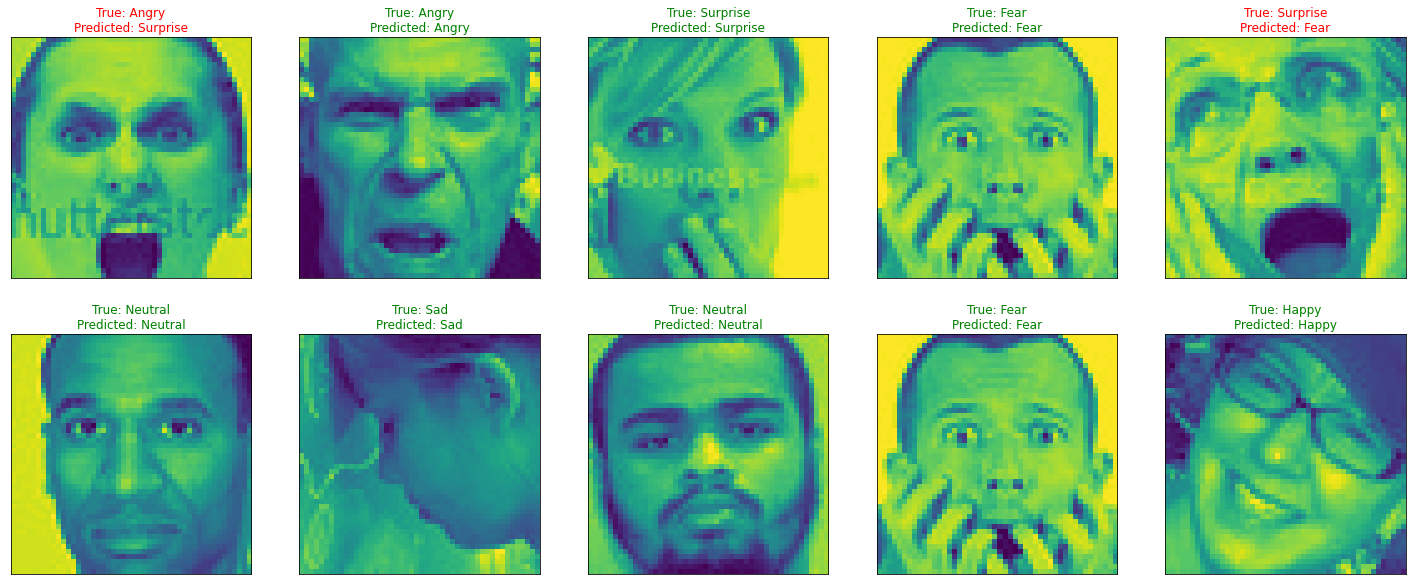

<Figure size 432x288 with 0 Axes>

In [47]:
Random_batch = np.random.randint(0, len(test_generator) - 1)
Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])
    Model_Prediction = np.argmax(model1.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))
    ax.imshow(Random_Img)
    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

In [34]:
train_loss, train_acc = model1.evaluate(trainDatagen)
test_loss, test_acc   = model1.evaluate(valDatagen)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

  3/359 [..............................] - ETA: 14:39 - loss: 1.1080 - accuracy: 0.6979

KeyboardInterrupt: 

In [11]:
import cv2
import numpy as np

# Load the cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start capturing video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: failed to capture image")
        break
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Draw rectangles around the faces and make predictions
    for (x, y, w, h) in faces:
        # Extract the face ROI
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1)) / 255.0
        
        # Make a prediction
        prediction = model1.predict(roi_gray)
        
        # Get the predicted emotion
        maxindex = int(np.argmax(prediction))
        emotion = Emotion_Classes[maxindex]

        # Draw the rectangle and predicted emotion text
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    # Display the resulting image
    cv2.imshow('frame', frame)
    
    # Exit the program when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 33ms/step


In [39]:
import pydot
print(pydot.__version__)

import graphviz
print(graphviz.__version__)

1.4.2
0.20.1


In [42]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install pydot_ng

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install plot_model

Note: you may need to restart the kernel to use updated packages.


In [44]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
def BKStart(input_shape=(42, 42, 1), num_classes=7):
    model = tf.keras.models.Sequential([
        # Convolutional layer 1
        tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same',activation='relu', input_shape=input_shape),
        # Max pooling layer 1
        tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        # Convolutional layer 2
        tf.keras.layers.Conv2D(32, (4, 4), strides=(1, 1), padding='same',activation='relu'),
        # Average pooling layer 1
        tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(2, 2)),
        # Convolutional layer 3
        tf.keras.layers.Conv2D(64, (5, 5), strides=(1, 1),activation='relu', padding='same'),
        # Average pooling layer 2
        tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=(2, 2)),
        # Flatten layer
        tf.keras.layers.Flatten(),
        # Fully connected layer 1
        tf.keras.layers.Dense(3072,activation='relu'),
        # Fully connected layer 2
        tf.keras.layers.Dense(num_classes)
    ])
    
    return model


In [31]:
model2=BKStart()
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 42, 42, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 32)        16416     
                                                                 
 average_pooling2d_8 (Averag  (None, 9, 9, 32)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          51264     
                                                                 
 average_pooling2d_9 (Averag  (None, 4, 4, 64)        

In [110]:
model2=load_model('model_optimal1.h5')

In [111]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_55 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 44, 44, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 22, 22, 32)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 20, 20, 64)       

In [48]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install nbconvert[webpdf]

     ---------------------------------------- 83.4/83.4 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 101.4/101.4 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
